In [22]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [23]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='medium')
# plt.rc('ytick', labelsize='medium')

In [24]:
df = aux.load_data(Path("../results_synced/stride/"))
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_train_csv,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv,target_nepochs,pretrain_nepochs
0,Trace,ResNet_DFS,False,1,0,128,5,1,0.374479,0.374479,...,training/EXP_stride_f1.0_base_2023-03-16_13-39...,11260,0,10985,NaN,NaN,NaN,NaN,41,NaN
1,Trace,ResNet_DFS,True,1,0,128,5,1,0.462240,0.462240,...,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,11260,33260,10985,0.284317,0.919347,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,109,54
2,Trace,ResNet_DFS,False,1,0,128,5,2,0.460417,0.460417,...,training/EXP_stride_f1.1_base_2023-03-16_20-46...,11245,0,10970,NaN,NaN,NaN,NaN,84,NaN
3,Trace,ResNet_DFS,True,1,0,128,5,2,0.370573,0.370573,...,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,11245,33245,10970,0.295644,0.912795,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,44,57
4,Trace,ResNet_DFS,False,1,0,128,5,3,0.439844,0.439844,...,training/EXP_stride_f1.2_base_2023-03-17_04-04...,11230,0,10955,NaN,NaN,NaN,NaN,44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,GunPoint,CNN_DFS,True,3,0,128,5,3,0.600098,0.600098,...,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,6105,18105,5955,0.109927,0.987760,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,81,57
576,GunPoint,CNN_DFS,False,3,0,128,5,4,0.692383,0.692383,...,training/EXP_stride_f3.3_base_2023-03-16_15-23...,6090,0,5940,NaN,NaN,NaN,NaN,118,NaN
577,GunPoint,CNN_DFS,True,3,0,128,5,4,0.674805,0.674805,...,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,6090,18090,5940,0.116305,0.986318,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,113,59
578,GunPoint,CNN_DFS,False,3,0,128,5,5,0.664551,0.664551,...,training/EXP_stride_f3.4_base_2023-03-16_15-58...,6075,0,5925,NaN,NaN,NaN,NaN,119,NaN


In [25]:
dfp = df.groupby(["dataset", "arch", "window_stride", "pretrained"])[
    ["target_val_acc", "target_test_acc", "pretrain_val_r2"]
    ].mean().reset_index()
dfp

,dataset,arch,window_stride,pretrained,target_val_acc,target_test_acc,pretrain_val_r2
0,Coffee,CNN_DFS,1,False,0.527500,0.484901,NaN
1,Coffee,CNN_DFS,1,True,0.658906,0.564488,0.977534
2,Coffee,CNN_DFS,2,False,0.536719,0.493414,NaN
3,Coffee,CNN_DFS,2,True,0.653438,0.577599,0.975123
4,Coffee,CNN_DFS,3,False,0.591562,0.528691,NaN
...,...,...,...,...,...,...,...
112,Trace,ResNet_DFS,2,False,0.452188,0.438842,NaN
113,Trace,ResNet_DFS,2,True,0.517708,0.446415,0.940207
114,Trace,ResNet_DFS,3,False,0.451146,0.425809,NaN
115,Trace,ResNet_DFS,3,True,0.488281,0.471752,0.958338


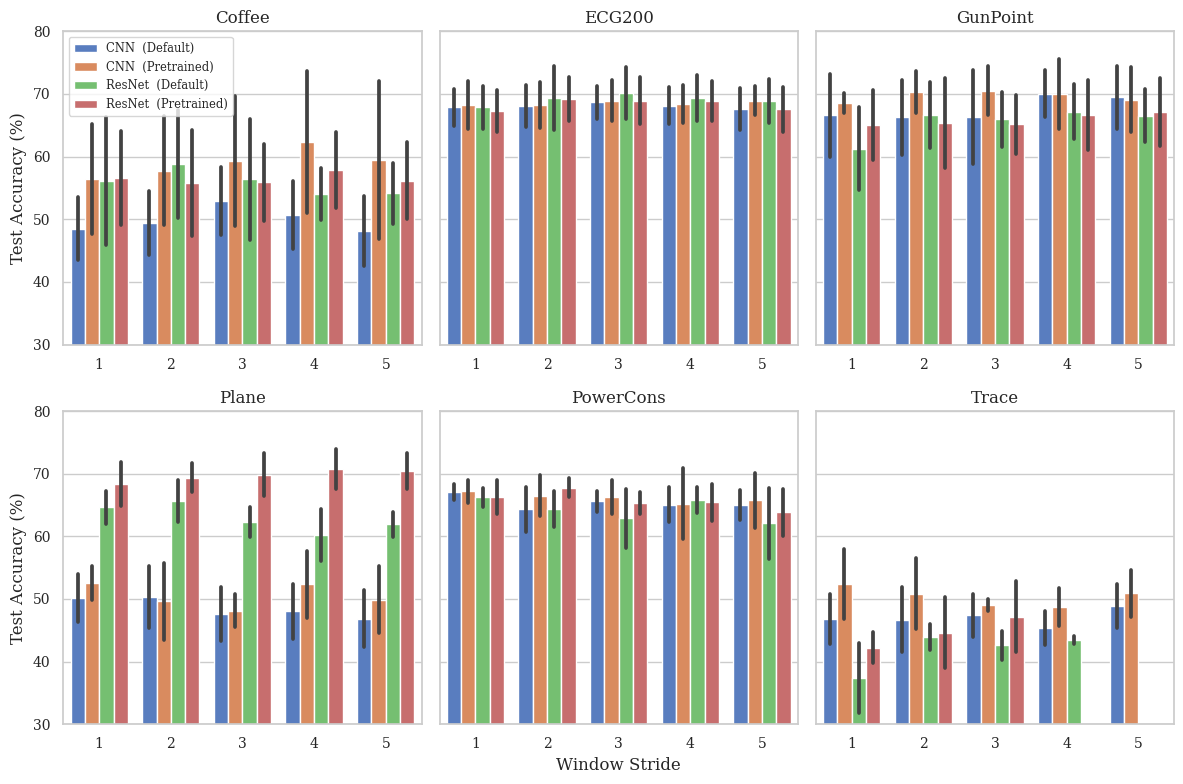

In [31]:
data = df.copy()
data["target_test_acc"] = 100*data["target_test_acc"]
data["target_val_acc"] = 100*data["target_val_acc"]
data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values(["hue", "dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x="window_stride", y="target_test_acc", hue="hue", col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (30, 80),
                    "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride")
g.add_legend(adjust_subtitles=True, fontsize="x-small")
g.facet_axis(0,2).set_xlabel("")
g.facet_axis(0,3).set_xlabel("")
g.facet_axis(0,5).set_xlabel("");

In [27]:
dfl = aux.load_data(Path("../results_synced/length/"))
dfl

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_train_csv,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv,target_nepochs,pretrain_nepochs
0,ECG200,ResNet_DFS,False,4,0,128,10,1,0.759375,0.759375,...,training/EXP_length_f4.0_base_2023-03-17_09-34...,3906,0,3810,NaN,NaN,NaN,NaN,10,NaN
1,ECG200,ResNet_DFS,True,4,0,128,10,1,0.776563,0.776563,...,training/EXP_length_f4.0_2023-03-17_09-56/logs...,3906,11586,3810,0.211006,0.955080,training/EXP_length_f4.0_2023-03-17_09-56/logs...,training/EXP_length_f4.0_2023-03-17_09-56/logs...,5,59
2,ECG200,ResNet_DFS,False,4,0,128,15,1,0.752344,0.752344,...,training/EXP_length_f4.1_base_2023-03-17_10-46...,3891,0,3795,NaN,NaN,NaN,NaN,60,NaN
3,ECG200,ResNet_DFS,True,4,0,128,15,1,0.777344,0.777344,...,training/EXP_length_f4.1_2023-03-17_11-18/logs...,3891,11571,3795,0.248229,0.937777,training/EXP_length_f4.1_2023-03-17_11-18/logs...,training/EXP_length_f4.1_2023-03-17_11-18/logs...,36,55
4,ECG200,ResNet_DFS,False,4,0,128,20,1,0.737500,0.737500,...,training/EXP_length_f4.2_base_2023-03-17_12-36...,3876,0,3780,NaN,NaN,NaN,NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,ECG200,ResNet_DFS,False,1,0,128,20,1,0.769531,0.769531,...,training/EXP_length_f1.2_base_2023-03-17_12-37...,3876,0,3780,NaN,NaN,NaN,NaN,89,NaN
80,ECG200,ResNet_DFS,True,1,0,128,20,1,0.762500,0.762500,...,training/EXP_length_f1.2_2023-03-17_13-20/logs...,3876,11556,3780,0.241879,0.940965,training/EXP_length_f1.2_2023-03-17_13-20/logs...,training/EXP_length_f1.2_2023-03-17_13-20/logs...,47,59
81,ECG200,ResNet_DFS,False,1,0,128,25,1,0.813281,0.813281,...,training/EXP_length_f1.3_base_2023-03-17_15-02...,3861,0,3765,NaN,NaN,NaN,NaN,71,NaN
82,ECG200,ResNet_DFS,True,1,0,128,25,1,0.789844,0.789844,...,training/EXP_length_f1.3_2023-03-17_15-56/logs...,3861,11541,3765,0.256945,0.933366,training/EXP_length_f1.3_2023-03-17_15-56/logs...,training/EXP_length_f1.3_2023-03-17_15-56/logs...,74,46


In [28]:
dflp = dfl.groupby(["dataset", "arch", "window_length", "pretrained"])[["target_val_acc", "target_test_acc", "pretrain_val_r2"]].mean().reset_index()
dflp

,dataset,arch,window_length,pretrained,target_val_acc,target_test_acc,pretrain_val_r2
0,Coffee,ResNet_DFS,10,False,0.773125,0.621965,NaN
1,Coffee,ResNet_DFS,10,True,0.730156,0.614458,0.985598
2,Coffee,ResNet_DFS,15,False,0.715104,0.618707,NaN
3,Coffee,ResNet_DFS,15,True,0.669531,0.511719,0.986615
4,ECG200,ResNet_DFS,10,False,0.746250,0.681250,NaN
5,ECG200,ResNet_DFS,10,True,0.762187,0.679795,0.952546
6,ECG200,ResNet_DFS,15,False,0.756094,0.691972,NaN
7,ECG200,ResNet_DFS,15,True,0.758125,0.695312,0.946763
8,ECG200,ResNet_DFS,20,False,0.757031,0.691595,NaN
9,ECG200,ResNet_DFS,20,True,0.758125,0.673545,0.943078


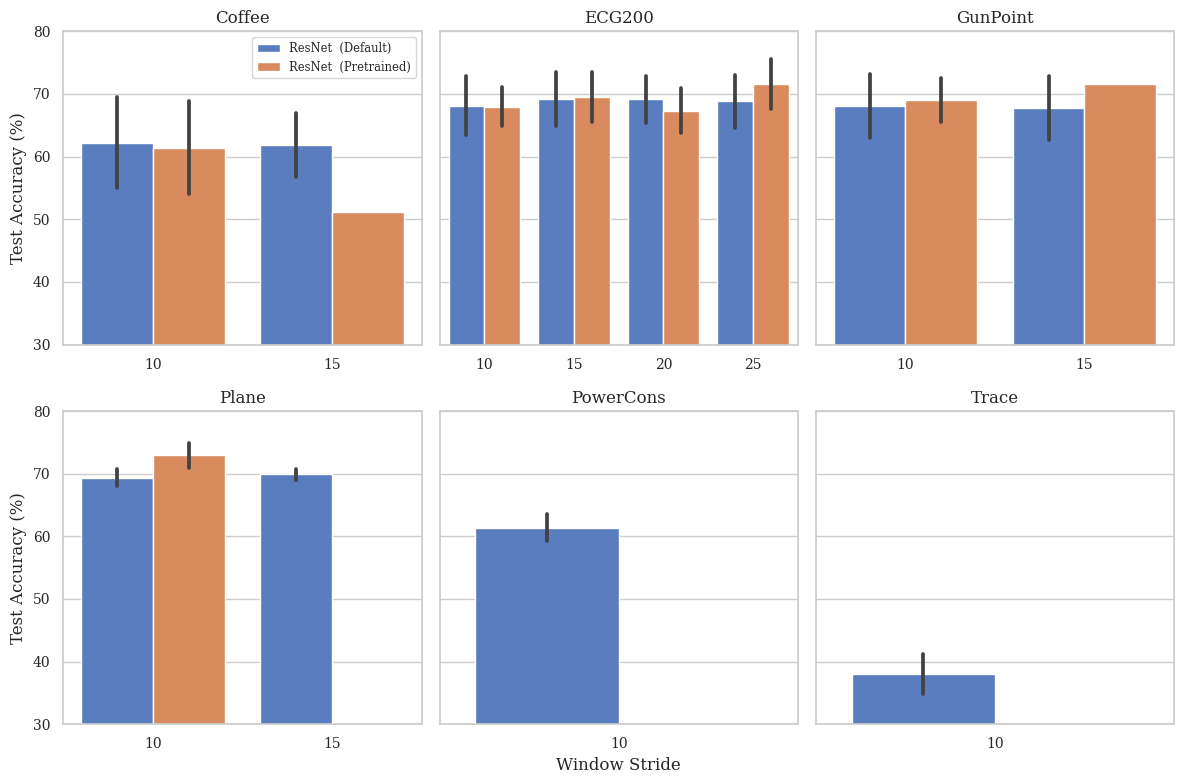

In [29]:
data = dfl.copy()
data["target_test_acc"] = 100*data["target_test_acc"]
data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values(["hue", "dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x="window_length", y="target_test_acc", hue="hue", col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (30, 80),
                    "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride")
g.add_legend(adjust_subtitles=True, fontsize="x-small")
g.facet_axis(0,2).set_xlabel("");
g.facet_axis(0,3).set_xlabel("");
g.facet_axis(0,5).set_xlabel("");